<a href="https://colab.research.google.com/github/ClaudioH19/TareasML/blob/master/Tareas/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

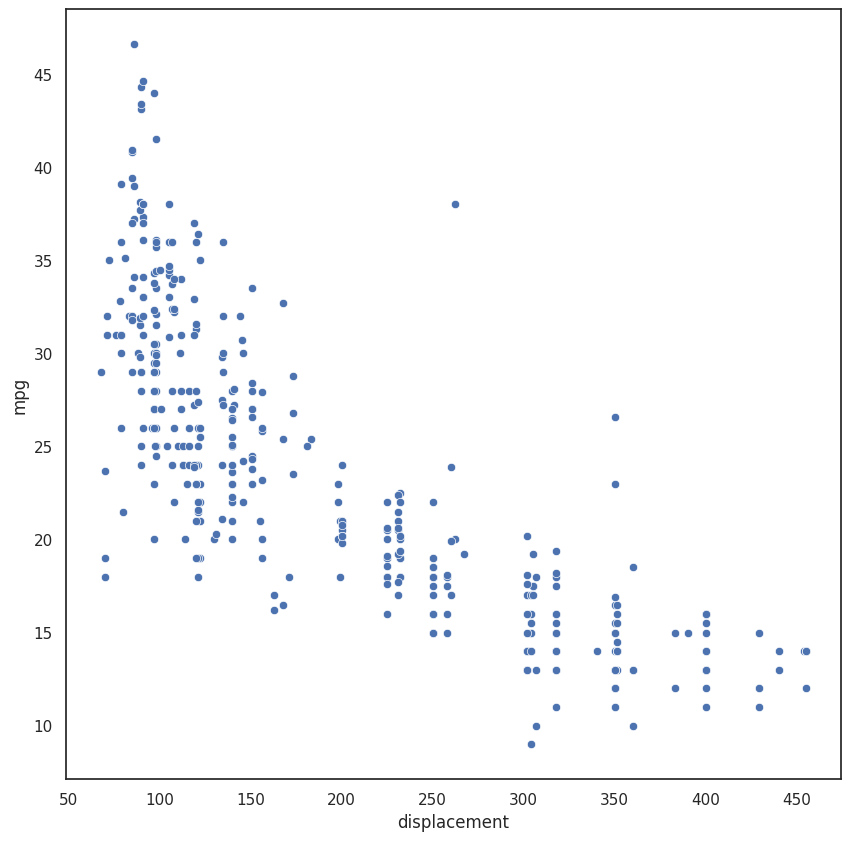

In [73]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

#show scatter plot
sns.scatterplot(x="displacement", y="mpg", data=mpg)
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("paper")


#parse origin column as numeric
mpg['origin'] = mpg['origin'].astype('category').cat.codes
mpg['origin'] = mpg['origin'].astype('int')

#parse name column as numeric
mpg['name'] = mpg['name'].astype('category').cat.codes
mpg['name'] = mpg['name'].astype('int')

#drop missing values
mpg = mpg.dropna()




2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

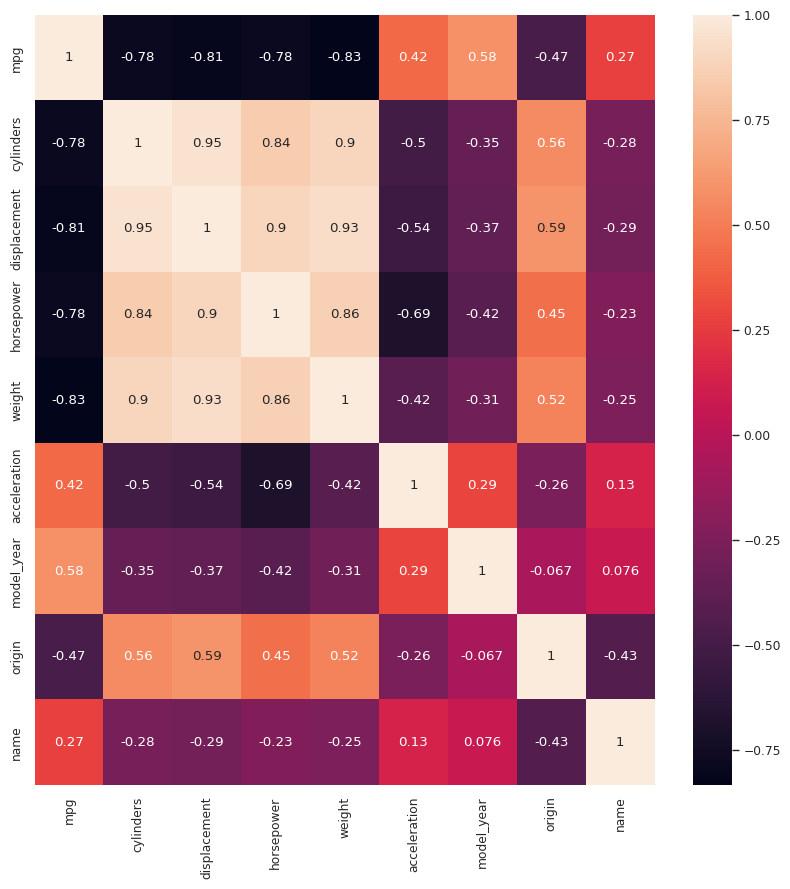

In [74]:
#show mpg dataset
#mpg.head()

#correlation without mpg column
corr = mpg.corr()

#generate matrix correlation
sns.heatmap(corr, annot=True)
sns.set(rc={'figure.figsize':(10,10)})


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [77]:
#extract mpg column as etiq
y = mpg['mpg']
#extract all columns except mpg column as features
X = mpg.drop(['mpg'], axis=1)

#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [78]:
#test model
y_pred = model.predict(X_test)

#show metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#show accuracy model
print('Accuracy: %.2f' % model.score(X_test, y_test))


Mean squared error: 10.87
Coefficient of determination: 0.79
Accuracy: 0.79


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


<Axes: xlabel='displacement', ylabel='cylinders'>

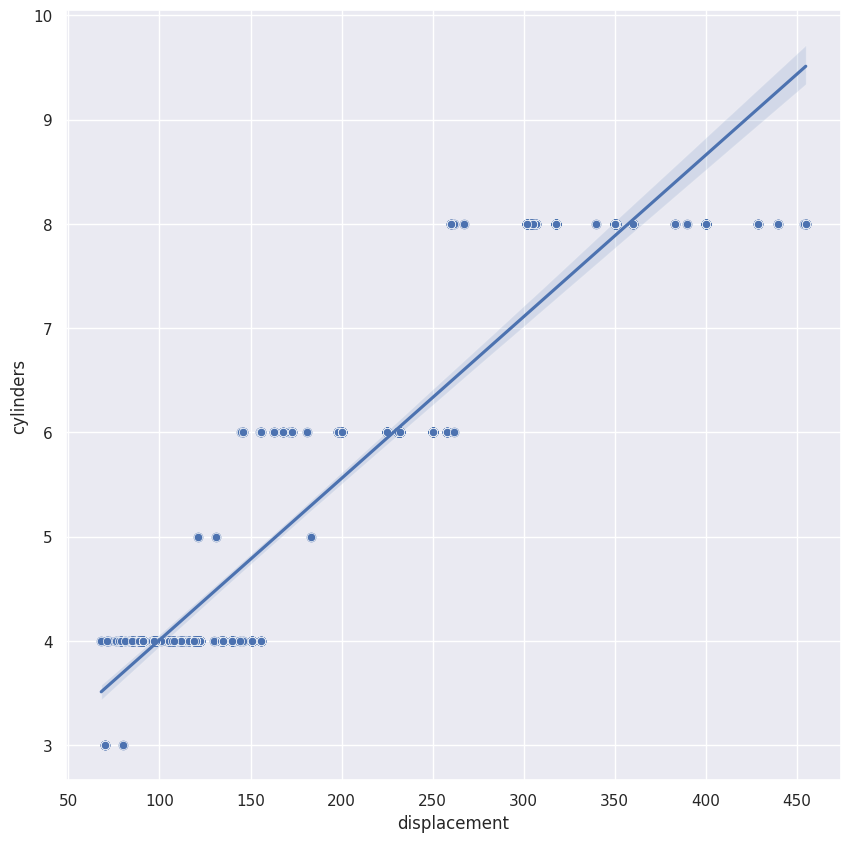

In [79]:
#show a line between displacement column and cilinders column
sns.regplot(x="displacement", y="cylinders", data=mpg)
#show a scatter plot and draw the line
sns.scatterplot(x="displacement", y="cylinders", data=mpg)

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.